In [37]:
import pandas as pd

## 실습에 활용한 예제

[국내 아이돌 평판지수 (csv)](http://bit.ly/ds-korean-idol)

## 얕은 복사 vs 깊은 복사

In [8]:
# a와 a를 복사한 b가 있다
# 변수명만 다르고, 데이터값/메모리가 같다.
# a를 바꾸면 b도 바뀜
# 이런 수준의 복사가 '얕은 복사(shallow copy)'

a = [1, 2, 3]
b = a


print(a)
print(b)


print(id(a))
print(id(b))

# id 함수 : 해당 변수의 메모리 주소 확인

[1, 2, 3]
[1, 2, 3]
1850787575488
1850787575488


In [9]:
# 깊은 복사
import copy
c = copy.deepcopy(a)

print(c)
print(id(c))

[1, 2, 3]
1850787457152


## DataFrame 로드

In [2]:
df = pd.read_csv('https://bit.ly/ds-korean-idol')

## 1. 데이터프레임 복사(copy)

copy는 단어 그대로, dataframe을 복사할 때 사용합니다.

In [3]:
df.head()

,이름,그룹,소속사,성별,생년월일,키,혈액형,브랜드평판지수
0,지민,방탄소년단,빅히트,남자,1995-10-13,173.6,A,10523260
1,지드래곤,빅뱅,YG,남자,1988-08-18,177.0,A,9916947
2,강다니엘,NaN,커넥트,남자,1996-12-10,180.0,A,8273745
3,뷔,방탄소년단,빅히트,남자,1995-12-30,178.0,AB,8073501
4,화사,마마무,RBW,여자,1995-07-23,162.1,A,7650928


In [4]:
df.tail()

,이름,그룹,소속사,성별,생년월일,키,혈액형,브랜드평판지수
10,태연,소녀시대,SM,여자,1989-03-09,NaN,A,3918661
11,차은우,아스트로,판타지오,남자,1997-03-30,183.0,B,3506027
12,백호,뉴이스트,플레디스,남자,1995-07-21,175.0,AB,3301654
13,JR,뉴이스트,플레디스,남자,1995-06-08,176.0,O,3274137
14,슈가,방탄소년단,빅히트,남자,1993-03-09,174.0,O,2925442


df를 **새로운 변수(new_df)에 대입**해 주고, 새로운 변수에서 값을 바꾼다면, 원래의 DataFrame의 값은 어떻게 될까요?

In [5]:
# 아래와 같이 복사할 경우는 데이터는 복사X, 데이터의 주소만 복사가 된다.
new_df = df

In [6]:
new_df.head()

,이름,그룹,소속사,성별,생년월일,키,혈액형,브랜드평판지수
0,지민,방탄소년단,빅히트,남자,1995-10-13,173.6,A,10523260
1,지드래곤,빅뱅,YG,남자,1988-08-18,177.0,A,9916947
2,강다니엘,NaN,커넥트,남자,1996-12-10,180.0,A,8273745
3,뷔,방탄소년단,빅히트,남자,1995-12-30,178.0,AB,8073501
4,화사,마마무,RBW,여자,1995-07-23,162.1,A,7650928


In [7]:
# df의 모든 '이름'컬럼을 0으로 변경
new_df['이름'] = 0

In [8]:
new_df.head()

,이름,그룹,소속사,성별,생년월일,키,혈액형,브랜드평판지수
0,0,방탄소년단,빅히트,남자,1995-10-13,173.6,A,10523260
1,0,빅뱅,YG,남자,1988-08-18,177.0,A,9916947
2,0,NaN,커넥트,남자,1996-12-10,180.0,A,8273745
3,0,방탄소년단,빅히트,남자,1995-12-30,178.0,AB,8073501
4,0,마마무,RBW,여자,1995-07-23,162.1,A,7650928


In [9]:
df.head()

,이름,그룹,소속사,성별,생년월일,키,혈액형,브랜드평판지수
0,0,방탄소년단,빅히트,남자,1995-10-13,173.6,A,10523260
1,0,빅뱅,YG,남자,1988-08-18,177.0,A,9916947
2,0,NaN,커넥트,남자,1996-12-10,180.0,A,8273745
3,0,방탄소년단,빅히트,남자,1995-12-30,178.0,AB,8073501
4,0,마마무,RBW,여자,1995-07-23,162.1,A,7650928


이렇게 되는 이유는 같은 메모리 주소를 참조하기 때문입니다.

In [16]:
# 메모리 주소값을 확인
id(df)

139684079273344

In [14]:
# 일반적으로 컴퓨터의 메모리 주소값은 16진수로 표현
hex(id(new_df))

'0x7f0abbed0580'

In [15]:
# 아래 코드를 통해 같은 메모리 주소값을 참조하는 것을 확인
hex(id(df))

'0x7f0abbed0580'

굉장히 많은 분들이 실수를 하시는 부분입니다.

**원본 데이터를 유지 시키고, 새로운 변수에 복사할 때는 copy()를 사용해 주세요**

In [10]:
df = pd.read_csv('https://bit.ly/ds-korean-idol')

In [11]:
# python에서 얕은 복사(주소값만 복사), 깊은 복사(deep copy)
copy_df = df.copy()

In [12]:
hex(id(df))

'0x1aeee1cb8e0'

In [13]:
hex(id(copy_df))

'0x1aeee1cb4f0'

In [14]:
df.head()

,이름,그룹,소속사,성별,생년월일,키,혈액형,브랜드평판지수
0,지민,방탄소년단,빅히트,남자,1995-10-13,173.6,A,10523260
1,지드래곤,빅뱅,YG,남자,1988-08-18,177.0,A,9916947
2,강다니엘,NaN,커넥트,남자,1996-12-10,180.0,A,8273745
3,뷔,방탄소년단,빅히트,남자,1995-12-30,178.0,AB,8073501
4,화사,마마무,RBW,여자,1995-07-23,162.1,A,7650928


In [15]:
copy_df.head()

,이름,그룹,소속사,성별,생년월일,키,혈액형,브랜드평판지수
0,지민,방탄소년단,빅히트,남자,1995-10-13,173.6,A,10523260
1,지드래곤,빅뱅,YG,남자,1988-08-18,177.0,A,9916947
2,강다니엘,NaN,커넥트,남자,1996-12-10,180.0,A,8273745
3,뷔,방탄소년단,빅히트,남자,1995-12-30,178.0,AB,8073501
4,화사,마마무,RBW,여자,1995-07-23,162.1,A,7650928


In [16]:
copy_df['이름'] = 0

In [17]:
copy_df.head()

,이름,그룹,소속사,성별,생년월일,키,혈액형,브랜드평판지수
0,0,방탄소년단,빅히트,남자,1995-10-13,173.6,A,10523260
1,0,빅뱅,YG,남자,1988-08-18,177.0,A,9916947
2,0,NaN,커넥트,남자,1996-12-10,180.0,A,8273745
3,0,방탄소년단,빅히트,남자,1995-12-30,178.0,AB,8073501
4,0,마마무,RBW,여자,1995-07-23,162.1,A,7650928


In [18]:
df.head()

,이름,그룹,소속사,성별,생년월일,키,혈액형,브랜드평판지수
0,지민,방탄소년단,빅히트,남자,1995-10-13,173.6,A,10523260
1,지드래곤,빅뱅,YG,남자,1988-08-18,177.0,A,9916947
2,강다니엘,NaN,커넥트,남자,1996-12-10,180.0,A,8273745
3,뷔,방탄소년단,빅히트,남자,1995-12-30,178.0,AB,8073501
4,화사,마마무,RBW,여자,1995-07-23,162.1,A,7650928


In [19]:
df.tail()

,이름,그룹,소속사,성별,생년월일,키,혈액형,브랜드평판지수
10,태연,소녀시대,SM,여자,1989-03-09,NaN,A,3918661
11,차은우,아스트로,판타지오,남자,1997-03-30,183.0,B,3506027
12,백호,뉴이스트,플레디스,남자,1995-07-21,175.0,AB,3301654
13,JR,뉴이스트,플레디스,남자,1995-06-08,176.0,O,3274137
14,슈가,방탄소년단,빅히트,남자,1993-03-09,174.0,O,2925442


## 2. dataFrame에 row, column 추가 및 삭제

### 2-1. row의 추가

In [25]:
df.head()

,이름,그룹,소속사,성별,생년월일,키,혈액형,브랜드평판지수
0,지민,방탄소년단,빅히트,남자,1995-10-13,173.6,A,10523260
1,지드래곤,빅뱅,YG,남자,1988-08-18,177.0,A,9916947
2,강다니엘,NaN,커넥트,남자,1996-12-10,180.0,A,8273745
3,뷔,방탄소년단,빅히트,남자,1995-12-30,178.0,AB,8073501
4,화사,마마무,RBW,여자,1995-07-23,162.1,A,7650928


In [28]:
df.tail()

,이름,그룹,소속사,성별,생년월일,키,혈액형,브랜드평판지수
10,태연,소녀시대,SM,여자,1989-03-09,NaN,A,3918661
11,차은우,아스트로,판타지오,남자,1997-03-30,183.0,B,3506027
12,백호,뉴이스트,플레디스,남자,1995-07-21,175.0,AB,3301654
13,JR,뉴이스트,플레디스,남자,1995-06-08,176.0,O,3274137
14,슈가,방탄소년단,빅히트,남자,1993-03-09,174.0,O,2925442


dictionary 형태의 데이터를 만들어 준다음 **append()** 함수를 사용하여 데이터를 추가할 수 있습니다. 반드시, **ignore_index=True** 옵션을 같이 추가해 주셔야 에러가 안납니다!

In [29]:
# df라는 데이터프레임에 한 행(row)을 추가(append)
# df.append(~~~) 실행했기에 df에 업데이트는 아직 하지 않음
df.append({'이름': '민영', '그룹': '브레이브 걸스', '소속사': '브레이브 엔터', '성별': '여자', '생년월일': '1990-09-12', '키': 165.0, '혈액형': 'AB', '브랜드평판지수': 12345678})

AttributeError: 'DataFrame' object has no attribute 'append'

In [23]:
df.tail()

,이름,그룹,소속사,성별,생년월일,키,혈액형,브랜드평판지수
10,태연,소녀시대,SM,여자,1989-03-09,NaN,A,3918661
11,차은우,아스트로,판타지오,남자,1997-03-30,183.0,B,3506027
12,백호,뉴이스트,플레디스,남자,1995-07-21,175.0,AB,3301654
13,JR,뉴이스트,플레디스,남자,1995-06-08,176.0,O,3274137
14,슈가,방탄소년단,빅히트,남자,1993-03-09,174.0,O,2925442


또한, append() 한 뒤 다시 df에 대입해줘야 변경한 값이 유지 됩니다.

In [24]:
df = df.append({'이름': '테디', '그룹': '테디그룹', '소속사': '끝내주는소속사', '성별': '남자', '생년월일': '1970-01-01', '키': 195.0, '혈액형': 'O', '브랜드평판지수': 12345678}, ignore_index=True)

AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
hex(id(df))

'0x7fb96b5ce150'

In [34]:
df.tail()

,이름,그룹,소속사,성별,생년월일,키,혈액형,브랜드평판지수
11,차은우,아스트로,판타지오,남자,1997-03-30,183.0,B,3506027
12,백호,뉴이스트,플레디스,남자,1995-07-21,175.0,AB,3301654
13,JR,뉴이스트,플레디스,남자,1995-06-08,176.0,O,3274137
14,슈가,방탄소년단,빅히트,남자,1993-03-09,174.0,O,2925442
15,테디,테디그룹,끝내주는소속사,남자,1970-01-01,195.0,O,12345678


### **2-2. column 추가**

column 추가는 매우 쉽습니다. 단순히 새로운 column을 만들고 값을 대입해주면, 자동으로 생성합니다.

In [ ]:
df.head()

,이름,그룹,소속사,성별,생년월일,키,혈액형,브랜드평판지수
0,지민,방탄소년단,빅히트,남자,1995-10-13,173.6,A,10523260
1,지드래곤,빅뱅,YG,남자,1988-08-18,177.0,A,9916947
2,강다니엘,NaN,커넥트,남자,1996-12-10,180.0,A,8273745
3,뷔,방탄소년단,빅히트,남자,1995-12-30,178.0,AB,8073501
4,화사,마마무,RBW,여자,1995-07-23,162.1,A,7650928


In [35]:
# df dataframe에 '국적'이라는 이름으로 column추가
df['국적'] = '대한민국'

In [36]:
df.head()

,이름,그룹,소속사,성별,생년월일,키,혈액형,브랜드평판지수,국적
0,지민,방탄소년단,빅히트,남자,1995-10-13,173.6,A,10523260,대한민국
1,지드래곤,빅뱅,YG,남자,1988-08-18,177.0,A,9916947,대한민국
2,강다니엘,NaN,커넥트,남자,1996-12-10,180.0,A,8273745,대한민국
3,뷔,방탄소년단,빅히트,남자,1995-12-30,178.0,AB,8073501,대한민국
4,화사,마마무,RBW,여자,1995-07-23,162.1,A,7650928,대한민국


In [37]:
df.tail()

,이름,그룹,소속사,성별,생년월일,키,혈액형,브랜드평판지수,국적
11,차은우,아스트로,판타지오,남자,1997-03-30,183.0,B,3506027,대한민국
12,백호,뉴이스트,플레디스,남자,1995-07-21,175.0,AB,3301654,대한민국
13,JR,뉴이스트,플레디스,남자,1995-06-08,176.0,O,3274137,대한민국
14,슈가,방탄소년단,빅히트,남자,1993-03-09,174.0,O,2925442,대한민국
15,테디,테디그룹,끝내주는소속사,남자,1970-01-01,195.0,O,12345678,대한민국


전부 동일한 값이 추가 되면서, column도 추가된 것을 보실 수 있습니다.

만약, 값을 변경하고 싶다면, loc 함수를 활용해서 변경해 줄 수 있겠죠?

In [38]:
# 데이터를 특정한 행, 특정한 컬럼 값만 변경하고 싶은 경우
# 특정 행   : df['이름'] == '지드래곤'
# 특정 컬럼 : '국적'
df.loc[ df['이름'] == '지드래곤' , '국적'] = 'korea'

In [39]:
df.head()

,이름,그룹,소속사,성별,생년월일,키,혈액형,브랜드평판지수,국적
0,지민,방탄소년단,빅히트,남자,1995-10-13,173.6,A,10523260,대한민국
1,지드래곤,빅뱅,YG,남자,1988-08-18,177.0,A,9916947,korea
2,강다니엘,NaN,커넥트,남자,1996-12-10,180.0,A,8273745,대한민국
3,뷔,방탄소년단,빅히트,남자,1995-12-30,178.0,AB,8073501,대한민국
4,화사,마마무,RBW,여자,1995-07-23,162.1,A,7650928,대한민국


## 3. 통계값 다루기

In [40]:
df = pd.read_csv('https://bit.ly/ds-korean-idol')

통계값은 data type이 float나 int형 인 column을 다룹니다

In [41]:
df.head()

,이름,그룹,소속사,성별,생년월일,키,혈액형,브랜드평판지수
0,지민,방탄소년단,빅히트,남자,1995-10-13,173.6,A,10523260
1,지드래곤,빅뱅,YG,남자,1988-08-18,177.0,A,9916947
2,강다니엘,NaN,커넥트,남자,1996-12-10,180.0,A,8273745
3,뷔,방탄소년단,빅히트,남자,1995-12-30,178.0,AB,8073501
4,화사,마마무,RBW,여자,1995-07-23,162.1,A,7650928


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   이름       15 non-null     object 
 1   그룹       14 non-null     object 
 2   소속사      15 non-null     object 
 3   성별       15 non-null     object 
 4   생년월일     15 non-null     object 
 5   키        13 non-null     float64
 6   혈액형      15 non-null     object 
 7   브랜드평판지수  15 non-null     int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 1.1+ KB


In [ ]:
# 데이터프레임의 컬럼 데이터중 
# 수치 데이터만 골라서 통계치를 보여준다.
df.describe()

,키,브랜드평판지수
count,13.000000,1.500000e+01
mean,175.792308,5.655856e+06
std,5.820576,2.539068e+06
min,162.100000,2.925442e+06
25%,174.000000,3.712344e+06
50%,177.000000,4.668615e+06
75%,179.200000,7.862214e+06
max,183.000000,1.052326e+07


### 3-1. min(최소값), max(최대값)

통계값은 data type이 float나 int형 인 column을 다룹니다

In [ ]:
df['키']

0     173.6
1     177.0
2     180.0
3     178.0
4     162.1
5     178.0
6     182.3
7       NaN
8     179.2
9     167.1
10      NaN
11    183.0
12    175.0
13    176.0
14    174.0
Name: 키, dtype: float64

In [ ]:
df['키'].min()

162.1

In [ ]:
df['키'].max()

183.0

### 3-2. sum (합계), mean (평균)

#### **평균의 함정**

한 마을에 사는 사람들의 평균 연봉을 구하려고 할때

[100, 250, 140, 200, 2000000000000] 

200.... 이 사람 데이터를 포함해서 평균을 구하면 안된다.


이런 데이터를 outlier 라 하고

보통 outlier를 우려해서 중앙값을 평균값 근사치로 잡거나

min, max값을 제외하고 평균을 구한다


In [ ]:
df['키'].sum()

2285.3

In [ ]:
df['키'].mean()

175.7923076923077

### 3-3. var, variance(분산) / std, standard deviation (표준 편차)

* 분산과 표준편차는 데이터가 **평균으로부터 얼마나 떨어져 있는지 정도**를 나타냅니다.
* 분산은 **(데이터 - 평균) ** 2 을 모두 합한 값** / n
* 표준편차는 **분산의 루트**

In [43]:
# 선형 대수를 위한 패키지 
# 선형 대수 : 행렬, 벡터, 이미지
import numpy as np

In [44]:
# numpy에서 선형 대수를 위한 연산을 위해서는
# 첫번째로 데이터 타입을 numpy의 ndarray로 변경해줘야 한다.
data_01 = np.array([1, 3, 5, 7, 9])
data_02 = np.array([3, 4, 5, 6, 7])

In [45]:
type(data_01)

numpy.ndarray

In [46]:
# data_01 분산을 구하는 식
np.sqrt(((1-5)**2 + (3-5)**2 + (5-5)**2 + (7-5)**2 + (9-5)**2 ) / 5)

2.8284271247461903

In [47]:
data_01.mean()

5.0

In [ ]:
data_02.mean()

5.0

In [48]:
# data_01의 분산, data_02의 분산
data_01.var(), data_02.var()

(8.0, 2.0)

In [49]:
np.sqrt(data_01.var()), np.sqrt(data_02.var())

(2.8284271247461903, 1.4142135623730951)

In [50]:
# data_01의 표준편차, data_02의 표준편차
data_01.std(), data_02.std()

(2.8284271247461903, 1.4142135623730951)

주로 표준편자 (std)를 많이 사용하며, **데이터가 평균으로부터 얼마나 퍼져있는지 정도를 나타내는 지표라고 이해**하시면 됩니다.

In [ ]:
df['키'].var()

33.879102564102595

In [ ]:
df['키'].std()

5.820575793175672

### 3-4. 갯수를 세는 count

In [51]:
# count()함수는 결측치는 세지 않는다.
df['키'].count()

13

### 3.5. 중앙값(median value)

#### [1,3,5,7,9,11,1000] 
* 여기서 1000은 이상치(outlier)
평균값(mean) : 1+3+5+7+8+11+1000=1036/7 =148 
중앙값(median) : [1,3,5,7,9,11,1000] = 7(가운데에 있는 값을 선택)

In [ ]:
#df['키']값을 낮은 값에서 높은 값으로 sort()하고, 
# 그중에 가운데 위치한 값을 중앙값이라고 한다.

0     173.6
1     177.0
2     180.0
3     178.0
4     162.1
5     178.0
6     182.3
7       NaN
8     179.2
9     167.1
10      NaN
11    183.0
12    175.0
13    176.0
14    174.0
Name: 키, dtype: float64

In [52]:
df['키'].median()

177.0

### 3.6. 최빈값 (mode)
가장 많이 관측되는 수, 주어진 데이터에서 가장 갯수가 많은 값

In [ ]:
df['키'].mode()

0    178.0
dtype: float64

## 4. 피벗테이블 (pivot_table)

* 피벗테이블은 엑셀의 피벗테이블과 동일합니다.
* 데이터 열 중에서 **두 개의 열을 각각 행 인덱스, 열 인덱스로 사용**하여 데이터를 조회하여 펼쳐놓은 것을 의미합니다.
* 왼쪽에 나타나는 인덱스를 **행 인덱스, 상단에 나타나는 인덱스를 열 인덱스**라고 부릅니다.

In [30]:
df.head(15)

,이름,그룹,소속사,성별,생년월일,키,혈액형,브랜드평판지수
0,지민,방탄소년단,빅히트,남자,1995-10-13,173.6,A,10523260
1,지드래곤,빅뱅,YG,남자,1988-08-18,177.0,A,9916947
2,강다니엘,NaN,커넥트,남자,1996-12-10,180.0,A,8273745
3,뷔,방탄소년단,빅히트,남자,1995-12-30,178.0,AB,8073501
4,화사,마마무,RBW,여자,1995-07-23,162.1,A,7650928
5,정국,방탄소년단,빅히트,남자,1997-09-01,178.0,A,5208335
6,민현,뉴이스트,플레디스,남자,1995-08-09,182.3,O,4989792
7,소연,아이들,큐브,여자,1998-08-26,NaN,B,4668615
8,진,방탄소년단,빅히트,남자,1992-12-04,179.2,O,4570308
9,하성운,핫샷,스타크루이엔티,남자,1994-03-22,167.1,A,4036489


In [32]:
# 빅히트 지민과 정국이 같은 소속사이고 혈액형도 같은 경우
# 평균값으로 표현
# doc ref : https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html 

# index는 행 인덱스
# columns는 열 인덱스
# values는 조회하고 싶은 값
pd.pivot_table(df, index='소속사', columns='혈액형', values='키')

혈액형,A,AB,B,O
소속사,,,,
RBW,162.1,NaN,NaN,NaN
YG,177.0,NaN,NaN,NaN
빅히트,175.8,178.0,NaN,176.60
스타크루이엔티,167.1,NaN,NaN,NaN
커넥트,180.0,NaN,NaN,NaN
판타지오,NaN,NaN,183.0,NaN
플레디스,NaN,175.0,NaN,179.15


In [40]:
# aggfunc에는 추가 계산 옵션 (np.sum, np.mean) - 기본값은 평균

import numpy as np
pd.pivot_table(df, index='그룹', columns='혈액형', values='브랜드평판지수', aggfunc=np.mean)

C:\Users\SBA\AppData\Local\Temp\ipykernel_12852\546770601.py:4: FutureWarning: The provided callable <function mean at 0x000001AEE998E830> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.pivot_table(df, index='그룹', columns='혈액형', values='브랜드평판지수', aggfunc=np.mean)


혈액형,A,AB,B,O
그룹,,,,
뉴이스트,NaN,3301654.0,NaN,4131964.5
마마무,7650928.0,NaN,NaN,NaN
방탄소년단,7865797.5,8073501.0,NaN,3747875.0
빅뱅,9916947.0,NaN,NaN,NaN
소녀시대,3918661.0,NaN,NaN,NaN
아스트로,NaN,NaN,3506027.0,NaN
아이들,NaN,NaN,4668615.0,NaN
핫샷,4036489.0,NaN,NaN,NaN


## 5. GroupBy (그룹으로 묶어 보기)

* groupby는 데이터를 **그룹으로 묶어 분석**할 때 활용합니다.
* **소속사**별 키의 평균, **성별** 키의 평균 등 특정, 그룹별 통계 및 데이터의 성질을 확인하고자 할 때 활용합니다.

In [54]:
df.head()

,이름,그룹,소속사,성별,생년월일,키,혈액형,브랜드평판지수
0,지민,방탄소년단,빅히트,남자,1995-10-13,173.6,A,10523260
1,지드래곤,빅뱅,YG,남자,1988-08-18,177.0,A,9916947
2,강다니엘,NaN,커넥트,남자,1996-12-10,180.0,A,8273745
3,뷔,방탄소년단,빅히트,남자,1995-12-30,178.0,AB,8073501
4,화사,마마무,RBW,여자,1995-07-23,162.1,A,7650928


In [55]:
df.groupby('소속사')

groupby와 함께 

* count() - 갯수
* sum() - 합계
* mean() - 평균
* var() - 분산
* std() - 표준편차
* min()/max() - 최소값, 최대값



In [56]:
# 소속사를 기준으로 데이터의 갯수를 확인
df.groupby('소속사').count()

,이름,그룹,성별,생년월일,키,혈액형,브랜드평판지수
소속사,,,,,,,
RBW,1,1,1,1,1,1,1
SM,1,1,1,1,0,1,1
YG,1,1,1,1,1,1,1
빅히트,5,5,5,5,5,5,5
스타크루이엔티,1,1,1,1,1,1,1
커넥트,1,0,1,1,1,1,1
큐브,1,1,1,1,0,1,1
판타지오,1,1,1,1,1,1,1
플레디스,3,3,3,3,3,3,3


산술 통계는 자동으로 산술통계가 가능한 열만 출력됩니다.

In [ ]:
# df중에서 수치 데이터에 대해서만 mean()를 실행
df.groupby('그룹').mean()

,키,브랜드평판지수
그룹,,
뉴이스트,177.766667,3.855194e+06
마마무,162.100000,7.650928e+06
방탄소년단,176.560000,6.260169e+06
빅뱅,177.000000,9.916947e+06
소녀시대,NaN,3.918661e+06
아스트로,183.000000,3.506027e+06
아이들,NaN,4.668615e+06
핫샷,167.100000,4.036489e+06


In [ ]:
df.groupby('성별').sum()

,키,브랜드평판지수
성별,,
남자,2123.2,68599637
여자,162.1,16238204


특정 열만 출력하고 싶다면?

In [ ]:
df.groupby('혈액형')['키'].mean()

혈액형
A     172.966667
AB    176.500000
B     183.000000
O     177.875000
Name: 키, dtype: float64

## 6. Multi-Index(복합 인덱스)

### 6-1. Multi-Index 적용

행 인덱스를 복합적으로 구성하고 싶은 경우는 인덱스를 리스트로 만들어 줍니다.

In [57]:
df.groupby(['혈액형', '성별']).mean()

키     브랜드평판지수
혈액형 성별                     
A   남자  175.140  7591755.20
    여자  162.100  5784794.50
AB  남자  176.500  5687577.50
B   남자  183.000  3506027.00
    여자      NaN  4668615.00
O   남자  177.875  3939919.75

### 6-2. Multi-Index 데이터 프레임을 피벗 테이블로 변환

Multi-Index로 된 데이터프레임을 피벗테이블 형태로 다시 변환해 줄 수 있습니다.

In [58]:
# group index1 -> 혈액형, index2->성별
df2 = df.groupby(['혈액형', '성별']).mean()

In [59]:
df2

키     브랜드평판지수
혈액형 성별                     
A   남자  175.140  7591755.20
    여자  162.100  5784794.50
AB  남자  176.500  5687577.50
B   남자  183.000  3506027.00
    여자      NaN  4668615.00
O   남자  177.875  3939919.75

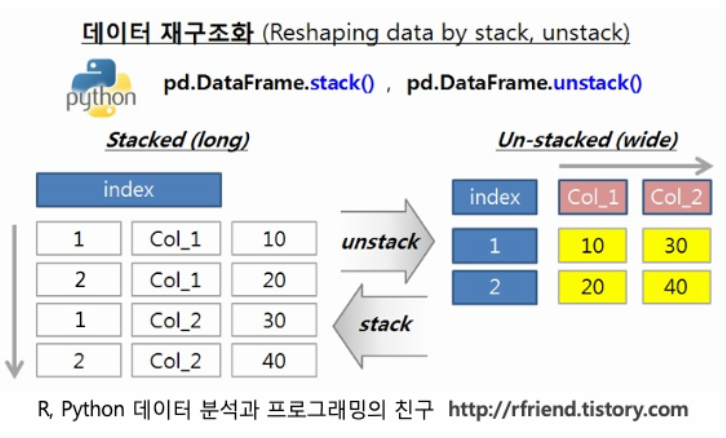

In [60]:
# 데이터 재구조화
df2.unstack('혈액형')

키                           브랜드평판지수                        \
혈액형       A     AB      B        O          A         AB          B   
성별                                                                    
남자   175.14  176.5  183.0  177.875  7591755.2  5687577.5  3506027.0   
여자   162.10    NaN    NaN      NaN  5784794.5        NaN  4668615.0   

                 
혈액형           O  
성별               
남자   3939919.75  
여자          NaN

In [ ]:
df2.unstack('성별')

### 6-3. 인덱스 초기화 (reset_index)

reset_index() 는 Multi-Index로 구성된 데이터 프레임의 **인덱스를 초기화**해 줍니다.

In [61]:
df2

키     브랜드평판지수
혈액형 성별                     
A   남자  175.140  7591755.20
    여자  162.100  5784794.50
AB  남자  176.500  5687577.50
B   남자  183.000  3506027.00
    여자      NaN  4668615.00
O   남자  177.875  3939919.75

In [62]:
df2.index

MultiIndex([( 'A', '남자'),
            ( 'A', '여자'),
            ('AB', '남자'),
            ( 'B', '남자'),
            ( 'B', '여자'),
            ( 'O', '남자')],
           names=['혈액형', '성별'])

In [63]:
# index를 새로 매긴다.
df2 = df2.reset_index()

In [64]:
df2

,혈액형,성별,키,브랜드평판지수
0,A,남자,175.140,7591755.20
1,A,여자,162.100,5784794.50
2,AB,남자,176.500,5687577.50
3,B,남자,183.000,3506027.00
4,B,여자,NaN,4668615.00
5,O,남자,177.875,3939919.75


In [65]:
df2.index

RangeIndex(start=0, stop=6, step=1)